In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense  , Dropout
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, accuracy_score, classification_report
from sklearn import metrics
import warnings as ws
ws.filterwarnings("ignore")
dataset = pd.read_csv('diabetes-dataset.csv')

In [2]:
print(dataset.shape)
dataset["Outcome"].value_counts()
print(dataset["Outcome"].value_counts())

(2000, 9)
0    1316
1     684
Name: Outcome, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

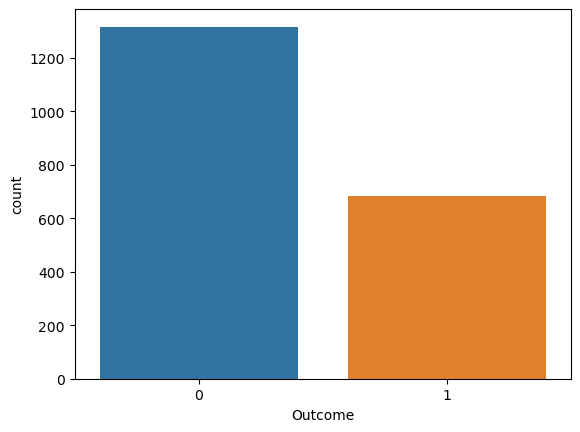

In [3]:
sns.countplot(x="Outcome", data=dataset)

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
#for debuging
dataset_dups=dataset[dataset.duplicated(subset=None, keep='first')]
array_indexes=dataset_dups.loc[dataset["Outcome"] == 0].index
new_indexx= []
cnt=0
for i in array_indexes :
    if cnt<632 :
        new_indexx.append(i)
        cnt+=1
dataset = dataset.drop(new_indexx)
#for debuging
dataset_dups=dataset[dataset.duplicated(subset=None, keep='first')]
healthy_dups = dataset_dups.loc[dataset["Outcome"] == 0].index
dataset = dataset.drop(healthy_dups)

dataset_dups=dataset[dataset.duplicated(subset=None, keep='first')]
healthy_dups = dataset_dups.loc[dataset["Outcome"] ==1].index    
dataset = dataset.drop(healthy_dups)

print(dataset.shape)

In [2]:
#for replace every 0 with mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    dataset[i].replace(0,dataset[i].mean(),inplace=True)

In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47,1
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23,0
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31,1
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24,1
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21,0


In [3]:
#z score normalization
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
maxx =[dataset['Pregnancies'].max(),dataset['Glucose'].max(),dataset['BloodPressure'].max(),dataset['SkinThickness'].max(),dataset['Insulin'].max(),dataset['BMI'].max(),dataset['DiabetesPedigreeFunction'].max(),dataset['Age'].max()]
stdd =[dataset['Pregnancies'].std(),dataset['Glucose'].std(),dataset['BloodPressure'].std(),dataset['SkinThickness'].std(),dataset['Insulin'].std(),dataset['BMI'].std(),dataset['DiabetesPedigreeFunction'].std(),dataset['Age'].std()]
meann =[dataset['Pregnancies'].mean(),dataset['Glucose'].mean(),dataset['BloodPressure'].mean(),dataset['SkinThickness'].mean(),dataset['Insulin'].mean(),dataset['BMI'].mean(),dataset['DiabetesPedigreeFunction'].mean(),dataset['Age'].mean()]
cnt=0
for i in variables:
    dataset[i]= (dataset[i]-meann[cnt])/stdd[cnt]
    cnt+=1

In [4]:
def z_score (example):
    cnt=-1
    for i in range(0,8):
        cnt+=1
        if example[i]==0 :
            continue
        example[i]= (example[i]-meann[cnt])/stdd[cnt]
    return example

In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.515265,0.524997,-0.856995,0.816180,-0.434119,0.132998,-1.062980,1.180129,1
1,-1.120215,-1.243571,0.814042,0.411485,0.072251,0.772745,-0.735367,-0.856112,0
2,-1.120215,0.754255,-0.259976,-0.606827,-0.434119,1.607198,0.491636,-0.177365,1
3,-1.120215,0.426743,-0.355684,1.524395,1.486820,1.342955,-0.327397,-0.771269,1
4,-0.817740,0.557748,-0.856995,1.423221,4.089626,1.120434,0.201111,-1.025799,0


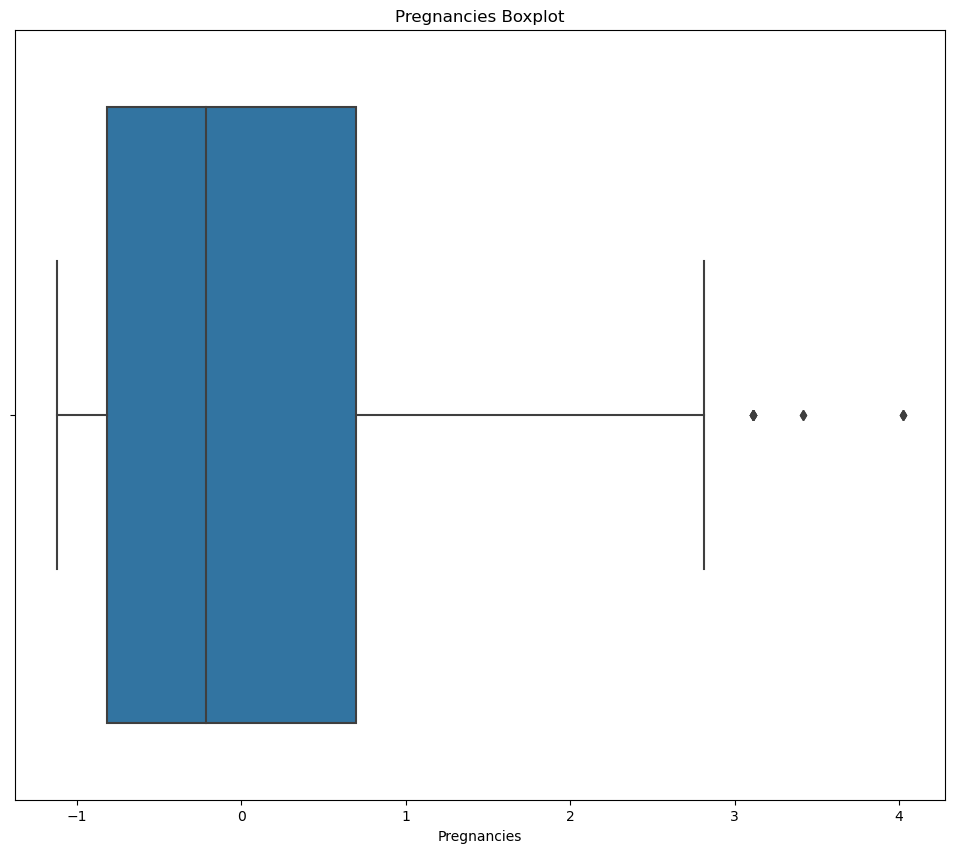

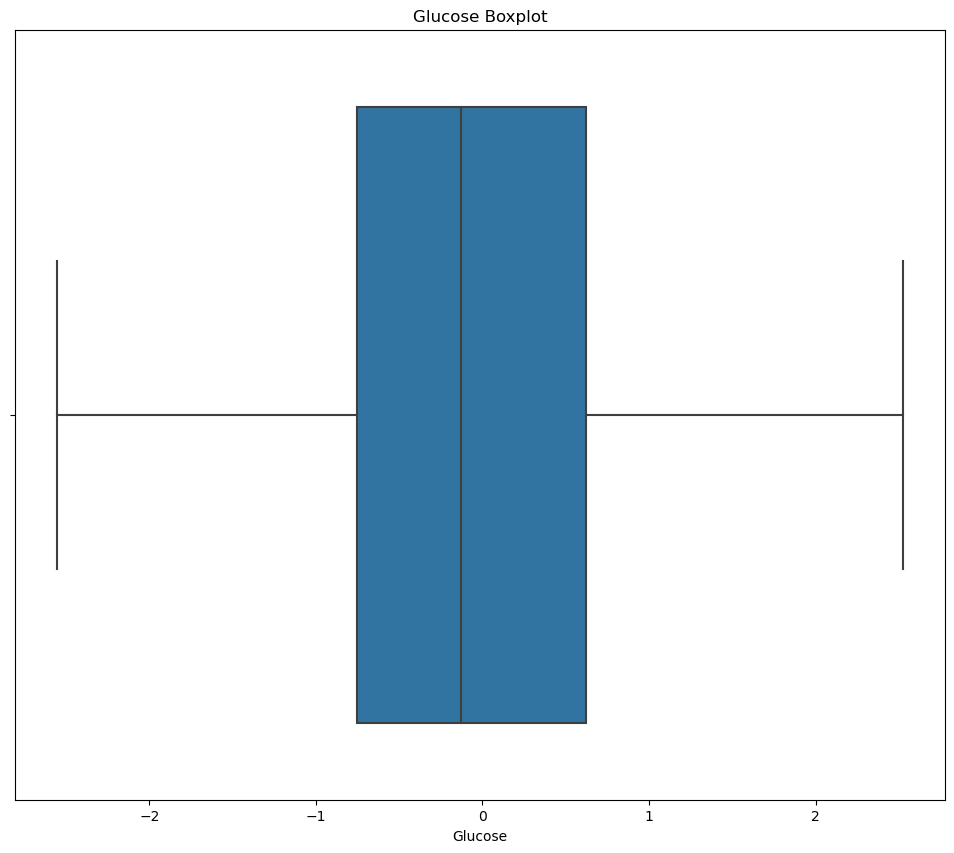

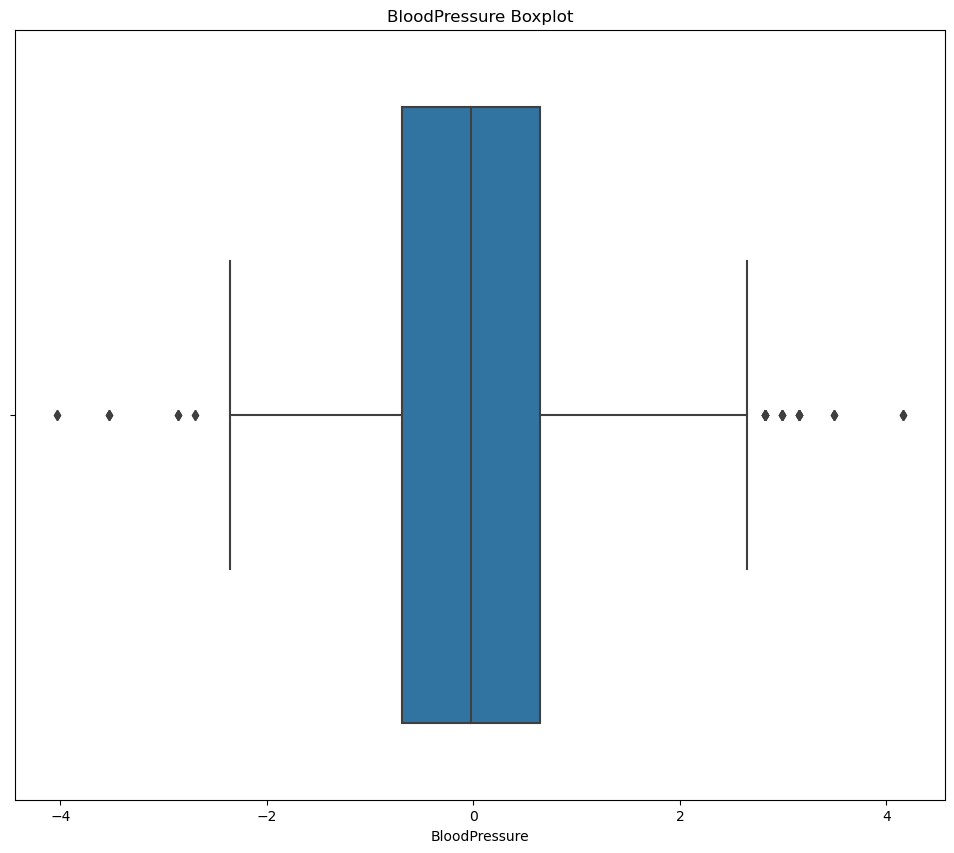

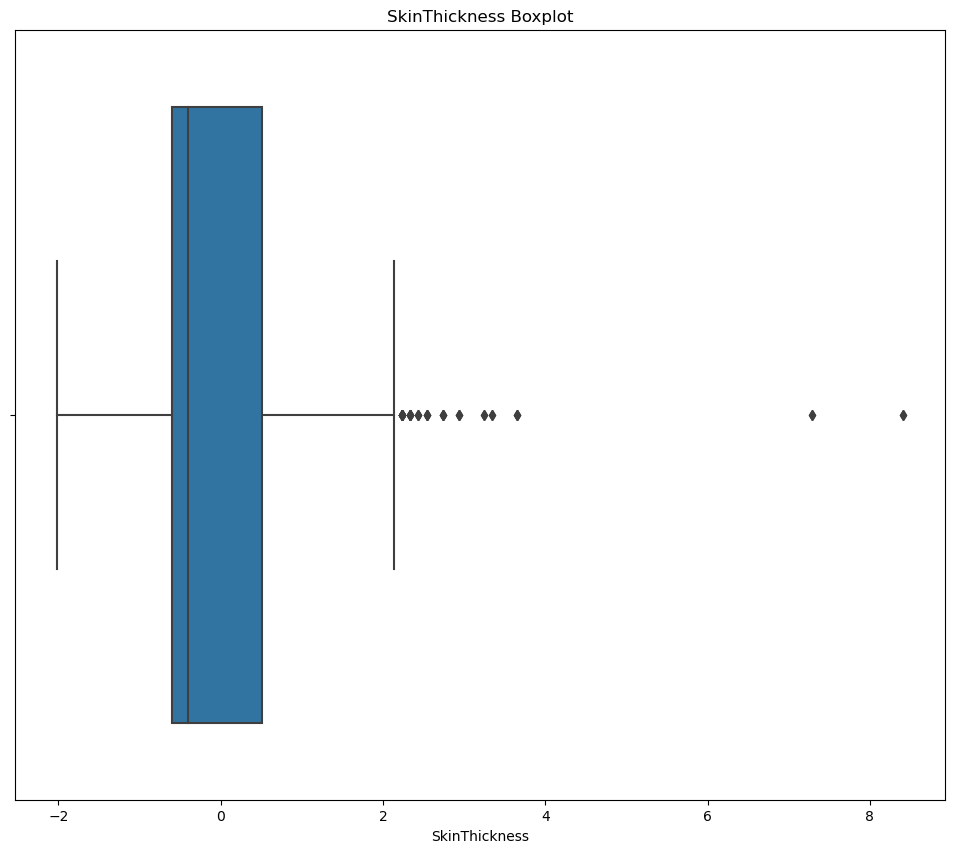

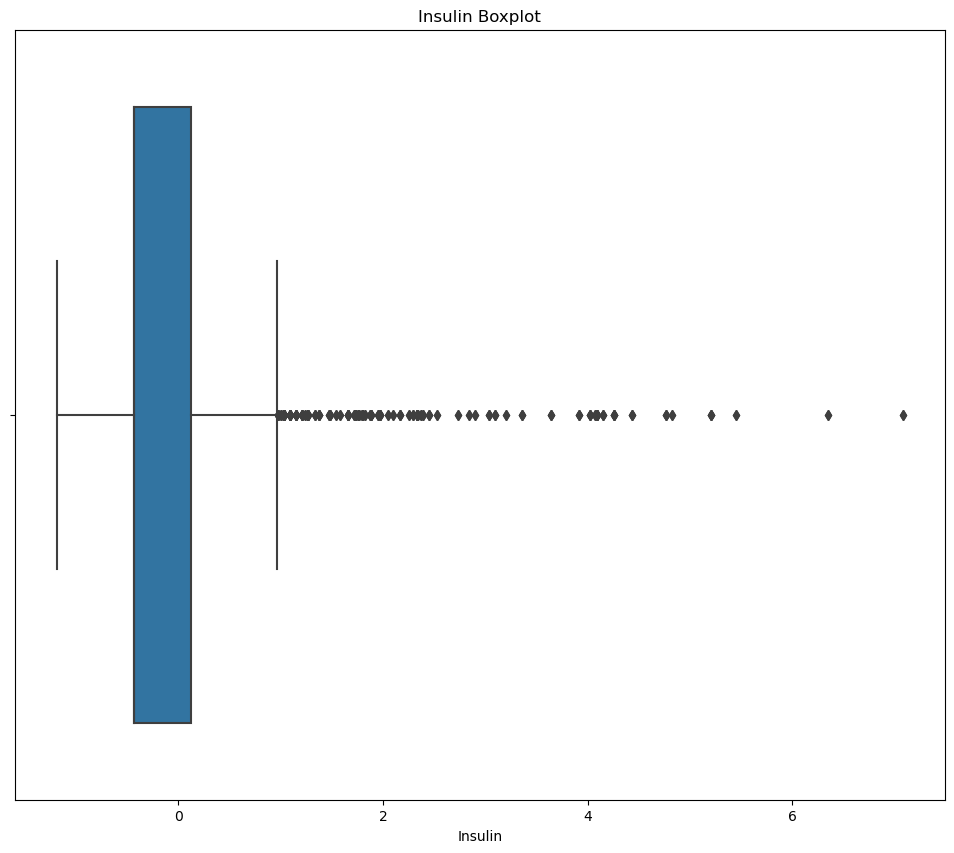

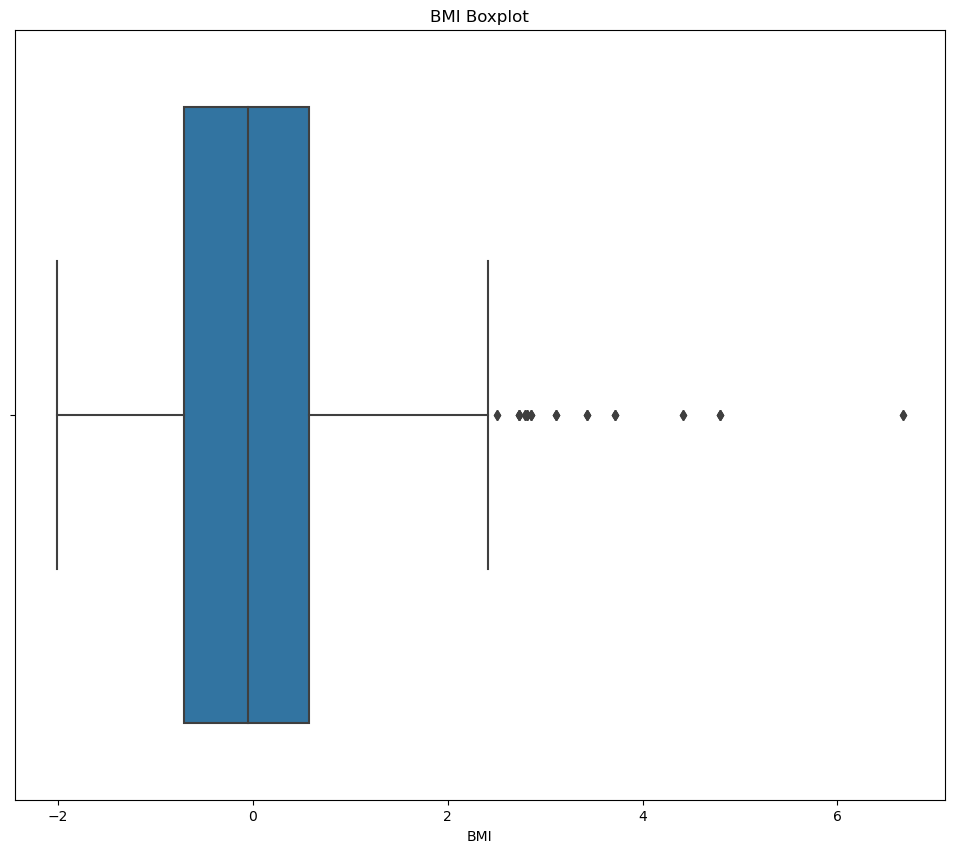

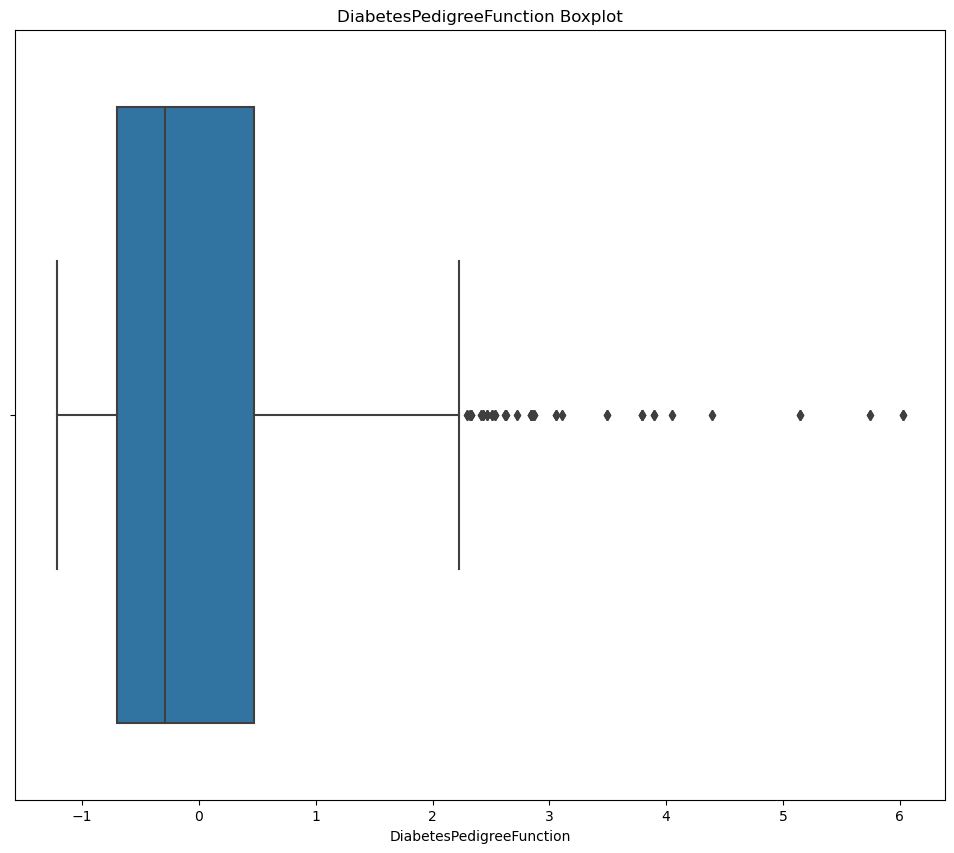

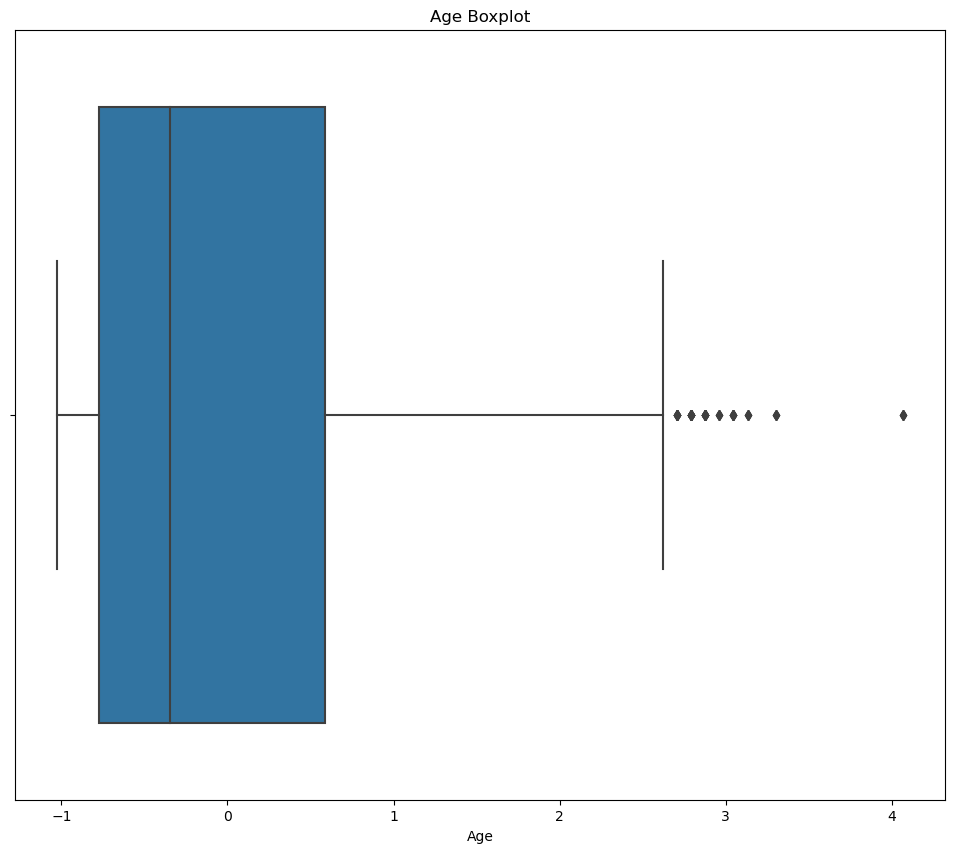

In [10]:
for column in dataset.columns[:-1]:
    plt.figure(figsize=(12, 10))
    plt.title(f"{column} Boxplot")
    sns.boxplot(data=dataset, x=column)

In [11]:
for column in dataset.columns[:-1]:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_range = (dataset[column] < (Q1 - 1.5*IQR)) | (dataset[column] > (Q3 + 1.5 * IQR))
    num_outliers = dataset[column][outlier_range].count()
    
    print(f"{column}: {num_outliers} outliers")

Pregnancies: 12 outliers
Glucose: 0 outliers
BloodPressure: 37 outliers
SkinThickness: 43 outliers
Insulin: 220 outliers
BMI: 30 outliers
DiabetesPedigreeFunction: 68 outliers
Age: 48 outliers


In [5]:
dataframeInNumpy = dataset.values
inputVariables = dataframeInNumpy[:,:8]
outputVariables = dataframeInNumpy[:,8:]
x_train, x_test, y_train, y_test = train_test_split(inputVariables, outputVariables, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(320,input_dim=8, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=30,validation_data=(x_test,y_test))
scores = model.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))
print("The new predection is:",model.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model.evaluate(x_train,y_train,verbose=0)
eval_res= model.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/100
54/54 [==============================] - 4s 17ms/step - loss: 0.4932 - accuracy: 0.7563 - val_loss: 0.4581 - val_accuracy: 0.7850
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4302 - accuracy: 0.7900 - val_loss: 0.4215 - val_accuracy: 0.8025
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.7981 - val_loss: 0.4358 - val_accuracy: 0.7750
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3961 - accuracy: 0.8037 - val_loss: 0.3852 - val_accuracy: 0.8225
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3706 - accuracy: 0.8156 - val_loss: 0.3978 - val_accuracy: 0.8000
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3491 - accuracy: 0.8213 - val_loss: 0.3509 - val_accuracy: 0.8325
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.8444 - val_loss: 0.3419 - val_accuracy: 0.8450
Epoch 8/100


In [14]:
model2 = Sequential()
model2.add(Dense(100,input_dim=8, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,epochs=50,batch_size=30,validation_data=(x_test,y_test))
scores = model2.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model2.metrics_names[1],scores[1]*100))
print("The new predection is:",model2.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model2.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model2.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model2.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model2.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model2.evaluate(x_train,y_train,verbose=0)
eval_res= model2.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/50
54/54 [==============================] - 1s 10ms/step - loss: 0.5774 - accuracy: 0.6956 - val_loss: 0.5064 - val_accuracy: 0.7650
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.7800 - val_loss: 0.4682 - val_accuracy: 0.7750
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.7831 - val_loss: 0.4516 - val_accuracy: 0.7725
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4280 - accuracy: 0.7850 - val_loss: 0.4438 - val_accuracy: 0.7900
Epoch 5/50
54/54 [==============================] - 0s 5ms/step - loss: 0.4198 - accuracy: 0.7975 - val_loss: 0.4388 - val_accuracy: 0.7825
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.7969 - val_loss: 0.4365 - val_accuracy: 0.7825
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8037 - val_loss: 0.4234 - val_accuracy: 0.8100
Epoch 8/50
54/54 [=

In [15]:
model3 = Sequential()
model3.add(Dense(100,input_dim=8, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history3=model3.fit(x_train,y_train,epochs=200,batch_size=30,validation_data=(x_test,y_test))
scores = model3.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model3.metrics_names[1],scores[1]*100))
print("The new predection is:",model3.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model3.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model3.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model3.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model3.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model3.evaluate(x_train,y_train,verbose=0)
eval_res= model3.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/200
54/54 [==============================] - 2s 10ms/step - loss: 0.6000 - accuracy: 0.7131 - val_loss: 0.5077 - val_accuracy: 0.7475
Epoch 2/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7688 - val_loss: 0.4678 - val_accuracy: 0.7725
Epoch 3/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.7812 - val_loss: 0.4505 - val_accuracy: 0.7800
Epoch 4/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.7806 - val_loss: 0.4482 - val_accuracy: 0.7750
Epoch 5/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.7881 - val_loss: 0.4324 - val_accuracy: 0.7875
Epoch 6/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.7925 - val_loss: 0.4270 - val_accuracy: 0.7875
Epoch 7/200
54/54 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.7969 - val_loss: 0.4191 - val_accuracy: 0.7900
Epoch 8/200


Epoch 59/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 0.9362 - val_loss: 0.2384 - val_accuracy: 0.8950
Epoch 60/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1869 - accuracy: 0.9331 - val_loss: 0.2425 - val_accuracy: 0.8900
Epoch 61/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9362 - val_loss: 0.2275 - val_accuracy: 0.8975
Epoch 62/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1787 - accuracy: 0.9337 - val_loss: 0.2221 - val_accuracy: 0.8925
Epoch 63/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1744 - accuracy: 0.9413 - val_loss: 0.2372 - val_accuracy: 0.8925
Epoch 64/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1711 - accuracy: 0.9394 - val_loss: 0.2337 - val_accuracy: 0.8925
Epoch 65/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9394 - val_loss: 0.2118 - val_accuracy: 0.9075
Epoch 

54/54 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 0.9981 - val_loss: 0.0471 - val_accuracy: 0.9900
Epoch 174/200
54/54 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9981 - val_loss: 0.0542 - val_accuracy: 0.9925
Epoch 175/200
54/54 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9994 - val_loss: 0.0448 - val_accuracy: 0.9925
Epoch 176/200
54/54 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9987 - val_loss: 0.0492 - val_accuracy: 0.9925
Epoch 177/200
54/54 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9987 - val_loss: 0.0573 - val_accuracy: 0.9900
Epoch 178/200
54/54 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9987 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 179/200
54/54 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.9987 - val_loss: 0.0581 - val_accuracy: 0.9900
Epoch 180/200

In [16]:
model4 = Sequential()
model4.add(Dense(100,input_dim=8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
history4=model4.fit(x_train,y_train,epochs=1000,batch_size=128,validation_data=(x_test,y_test))
scores = model4.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model4.metrics_names[1],scores[1]*100))
print("The new predection is:",model4.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model4.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model4.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model4.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model4.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model4.evaluate(x_train,y_train,verbose=0)
eval_res= model4.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/1000
13/13 [==============================] - 1s 31ms/step - loss: 0.7704 - accuracy: 0.3350 - val_loss: 0.7446 - val_accuracy: 0.3750
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7379 - accuracy: 0.3831 - val_loss: 0.7192 - val_accuracy: 0.4425
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7112 - accuracy: 0.4487 - val_loss: 0.6978 - val_accuracy: 0.5200
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5244 - val_loss: 0.6793 - val_accuracy: 0.6150
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.6687 - accuracy: 0.6094 - val_loss: 0.6632 - val_accuracy: 0.6675
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6514 - accuracy: 0.6606 - val_loss: 0.6492 - val_accuracy: 0.6950
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6363 - accuracy: 0.6931 - val_loss: 0.6368 - val_accuracy: 0.7025
Epoch

13/13 [==============================] - 0s 8ms/step - loss: 0.4480 - accuracy: 0.7850 - val_loss: 0.4719 - val_accuracy: 0.7700
Epoch 116/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4477 - accuracy: 0.7850 - val_loss: 0.4717 - val_accuracy: 0.7700
Epoch 117/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4475 - accuracy: 0.7850 - val_loss: 0.4715 - val_accuracy: 0.7725
Epoch 118/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4473 - accuracy: 0.7850 - val_loss: 0.4715 - val_accuracy: 0.7675
Epoch 119/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4471 - accuracy: 0.7844 - val_loss: 0.4712 - val_accuracy: 0.7725
Epoch 120/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4468 - accuracy: 0.7856 - val_loss: 0.4711 - val_accuracy: 0.7725
Epoch 121/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4466 - accuracy: 0.7856 - val_loss: 0.4710 - val_accuracy: 0.7675
Epoch 1

Epoch 172/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4378 - accuracy: 0.7819 - val_loss: 0.4623 - val_accuracy: 0.7775
Epoch 173/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4377 - accuracy: 0.7819 - val_loss: 0.4621 - val_accuracy: 0.7775
Epoch 174/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4375 - accuracy: 0.7819 - val_loss: 0.4620 - val_accuracy: 0.7775
Epoch 175/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4374 - accuracy: 0.7819 - val_loss: 0.4619 - val_accuracy: 0.7775
Epoch 176/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4372 - accuracy: 0.7819 - val_loss: 0.4618 - val_accuracy: 0.7775
Epoch 177/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4371 - accuracy: 0.7819 - val_loss: 0.4616 - val_accuracy: 0.7775
Epoch 178/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4369 - accuracy: 0.7837 - val_loss: 0.4615 - val_accuracy:

Epoch 229/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4304 - accuracy: 0.7856 - val_loss: 0.4548 - val_accuracy: 0.7825
Epoch 230/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4303 - accuracy: 0.7862 - val_loss: 0.4547 - val_accuracy: 0.7825
Epoch 231/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4301 - accuracy: 0.7856 - val_loss: 0.4545 - val_accuracy: 0.7825
Epoch 232/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4300 - accuracy: 0.7869 - val_loss: 0.4544 - val_accuracy: 0.7825
Epoch 233/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4299 - accuracy: 0.7856 - val_loss: 0.4544 - val_accuracy: 0.7825
Epoch 234/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4298 - accuracy: 0.7862 - val_loss: 0.4542 - val_accuracy: 0.7825
Epoch 235/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4296 - accuracy: 0.7869 - val_loss: 0.4543 - val_accuracy:

Epoch 286/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4242 - accuracy: 0.7862 - val_loss: 0.4486 - val_accuracy: 0.7900
Epoch 287/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4241 - accuracy: 0.7869 - val_loss: 0.4485 - val_accuracy: 0.7900
Epoch 288/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4240 - accuracy: 0.7856 - val_loss: 0.4484 - val_accuracy: 0.7900
Epoch 289/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4239 - accuracy: 0.7856 - val_loss: 0.4484 - val_accuracy: 0.7900
Epoch 290/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4238 - accuracy: 0.7862 - val_loss: 0.4483 - val_accuracy: 0.7900
Epoch 291/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4237 - accuracy: 0.7875 - val_loss: 0.4482 - val_accuracy: 0.7900
Epoch 292/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4236 - accuracy: 0.7869 - val_loss: 0.4482 - val_accuracy:

Epoch 343/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4189 - accuracy: 0.7875 - val_loss: 0.4435 - val_accuracy: 0.7850
Epoch 344/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.7887 - val_loss: 0.4434 - val_accuracy: 0.7850
Epoch 345/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4187 - accuracy: 0.7887 - val_loss: 0.4434 - val_accuracy: 0.7850
Epoch 346/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4187 - accuracy: 0.7869 - val_loss: 0.4433 - val_accuracy: 0.7850
Epoch 347/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4186 - accuracy: 0.7900 - val_loss: 0.4432 - val_accuracy: 0.7850
Epoch 348/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4185 - accuracy: 0.7887 - val_loss: 0.4431 - val_accuracy: 0.7850
Epoch 349/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4184 - accuracy: 0.7869 - val_loss: 0.4431 - val_accuracy:

Epoch 400/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4142 - accuracy: 0.7900 - val_loss: 0.4386 - val_accuracy: 0.7850
Epoch 401/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4141 - accuracy: 0.7900 - val_loss: 0.4385 - val_accuracy: 0.7850
Epoch 402/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4140 - accuracy: 0.7900 - val_loss: 0.4384 - val_accuracy: 0.7850
Epoch 403/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4140 - accuracy: 0.7906 - val_loss: 0.4385 - val_accuracy: 0.7850
Epoch 404/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4139 - accuracy: 0.7900 - val_loss: 0.4383 - val_accuracy: 0.7850
Epoch 405/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.7900 - val_loss: 0.4383 - val_accuracy: 0.7850
Epoch 406/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4137 - accuracy: 0.7900 - val_loss: 0.4382 - val_accuracy:

Epoch 457/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.4099 - accuracy: 0.7925 - val_loss: 0.4347 - val_accuracy: 0.7875
Epoch 458/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4098 - accuracy: 0.7925 - val_loss: 0.4347 - val_accuracy: 0.7875
Epoch 459/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4097 - accuracy: 0.7944 - val_loss: 0.4345 - val_accuracy: 0.7875
Epoch 460/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4097 - accuracy: 0.7937 - val_loss: 0.4345 - val_accuracy: 0.7875
Epoch 461/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4097 - accuracy: 0.7931 - val_loss: 0.4344 - val_accuracy: 0.7850
Epoch 462/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4095 - accuracy: 0.7937 - val_loss: 0.4344 - val_accuracy: 0.7850
Epoch 463/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4095 - accuracy: 0.7925 - val_loss: 0.4345 - val_accuracy

Epoch 514/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4061 - accuracy: 0.7981 - val_loss: 0.4313 - val_accuracy: 0.7950
Epoch 515/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4061 - accuracy: 0.7981 - val_loss: 0.4312 - val_accuracy: 0.7950
Epoch 516/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4060 - accuracy: 0.7981 - val_loss: 0.4311 - val_accuracy: 0.7975
Epoch 517/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4060 - accuracy: 0.7981 - val_loss: 0.4311 - val_accuracy: 0.7975
Epoch 518/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4059 - accuracy: 0.7994 - val_loss: 0.4310 - val_accuracy: 0.7975
Epoch 519/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4058 - accuracy: 0.7994 - val_loss: 0.4310 - val_accuracy: 0.7975
Epoch 520/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4058 - accuracy: 0.7994 - val_loss: 0.4308 - val_accuracy:

Epoch 571/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.4026 - accuracy: 0.8019 - val_loss: 0.4279 - val_accuracy: 0.8025
Epoch 572/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4026 - accuracy: 0.8019 - val_loss: 0.4277 - val_accuracy: 0.8025
Epoch 573/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4025 - accuracy: 0.8019 - val_loss: 0.4277 - val_accuracy: 0.8025
Epoch 574/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4024 - accuracy: 0.8019 - val_loss: 0.4275 - val_accuracy: 0.8050
Epoch 575/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8031 - val_loss: 0.4275 - val_accuracy: 0.8050
Epoch 576/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8044 - val_loss: 0.4276 - val_accuracy: 0.8025
Epoch 577/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8025 - val_loss: 0.4275 - val_accuracy:

Epoch 628/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3994 - accuracy: 0.8075 - val_loss: 0.4246 - val_accuracy: 0.8075
Epoch 629/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3994 - accuracy: 0.8075 - val_loss: 0.4247 - val_accuracy: 0.8075
Epoch 630/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3993 - accuracy: 0.8081 - val_loss: 0.4247 - val_accuracy: 0.8075
Epoch 631/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3993 - accuracy: 0.8081 - val_loss: 0.4248 - val_accuracy: 0.8075
Epoch 632/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3992 - accuracy: 0.8087 - val_loss: 0.4247 - val_accuracy: 0.8075
Epoch 633/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3991 - accuracy: 0.8075 - val_loss: 0.4246 - val_accuracy: 0.8075
Epoch 634/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3991 - accuracy: 0.8075 - val_loss: 0.4245 - val_accuracy:

Epoch 685/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3965 - accuracy: 0.8100 - val_loss: 0.4225 - val_accuracy: 0.8125
Epoch 686/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.8100 - val_loss: 0.4225 - val_accuracy: 0.8125
Epoch 687/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3963 - accuracy: 0.8119 - val_loss: 0.4225 - val_accuracy: 0.8125
Epoch 688/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3963 - accuracy: 0.8119 - val_loss: 0.4225 - val_accuracy: 0.8125
Epoch 689/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3963 - accuracy: 0.8106 - val_loss: 0.4225 - val_accuracy: 0.8125
Epoch 690/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3962 - accuracy: 0.8112 - val_loss: 0.4226 - val_accuracy: 0.8125
Epoch 691/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3962 - accuracy: 0.8119 - val_loss: 0.4224 - val_accuracy:

Epoch 742/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.8138 - val_loss: 0.4199 - val_accuracy: 0.8125
Epoch 743/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.8125 - val_loss: 0.4199 - val_accuracy: 0.8125
Epoch 744/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.8144 - val_loss: 0.4197 - val_accuracy: 0.8125
Epoch 745/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3934 - accuracy: 0.8144 - val_loss: 0.4197 - val_accuracy: 0.8125
Epoch 746/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3934 - accuracy: 0.8144 - val_loss: 0.4196 - val_accuracy: 0.8125
Epoch 747/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3934 - accuracy: 0.8125 - val_loss: 0.4196 - val_accuracy: 0.8125
Epoch 748/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3933 - accuracy: 0.8144 - val_loss: 0.4195 - val_accuracy:

Epoch 799/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3908 - accuracy: 0.8119 - val_loss: 0.4171 - val_accuracy: 0.8125
Epoch 800/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3908 - accuracy: 0.8112 - val_loss: 0.4172 - val_accuracy: 0.8125
Epoch 801/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3907 - accuracy: 0.8119 - val_loss: 0.4171 - val_accuracy: 0.8125
Epoch 802/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3907 - accuracy: 0.8119 - val_loss: 0.4170 - val_accuracy: 0.8125
Epoch 803/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.8119 - val_loss: 0.4171 - val_accuracy: 0.8125
Epoch 804/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.8119 - val_loss: 0.4170 - val_accuracy: 0.8125
Epoch 805/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3905 - accuracy: 0.8119 - val_loss: 0.4170 - val_accuracy:

Epoch 856/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3882 - accuracy: 0.8131 - val_loss: 0.4146 - val_accuracy: 0.8125
Epoch 857/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3882 - accuracy: 0.8131 - val_loss: 0.4147 - val_accuracy: 0.8125
Epoch 858/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3882 - accuracy: 0.8131 - val_loss: 0.4148 - val_accuracy: 0.8125
Epoch 859/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3881 - accuracy: 0.8131 - val_loss: 0.4146 - val_accuracy: 0.8125
Epoch 860/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3880 - accuracy: 0.8131 - val_loss: 0.4144 - val_accuracy: 0.8125
Epoch 861/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3880 - accuracy: 0.8131 - val_loss: 0.4145 - val_accuracy: 0.8125
Epoch 862/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.8131 - val_loss: 0.4146 - val_accuracy:

Epoch 913/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3856 - accuracy: 0.8169 - val_loss: 0.4123 - val_accuracy: 0.8125
Epoch 914/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3856 - accuracy: 0.8163 - val_loss: 0.4122 - val_accuracy: 0.8125
Epoch 915/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3855 - accuracy: 0.8169 - val_loss: 0.4121 - val_accuracy: 0.8125
Epoch 916/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3855 - accuracy: 0.8163 - val_loss: 0.4122 - val_accuracy: 0.8125
Epoch 917/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3854 - accuracy: 0.8175 - val_loss: 0.4122 - val_accuracy: 0.8125
Epoch 918/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3854 - accuracy: 0.8181 - val_loss: 0.4123 - val_accuracy: 0.8125
Epoch 919/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3853 - accuracy: 0.8181 - val_loss: 0.4122 - val_accuracy:

Epoch 970/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3831 - accuracy: 0.8194 - val_loss: 0.4101 - val_accuracy: 0.8125
Epoch 971/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3830 - accuracy: 0.8194 - val_loss: 0.4101 - val_accuracy: 0.8125
Epoch 972/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3830 - accuracy: 0.8188 - val_loss: 0.4101 - val_accuracy: 0.8100
Epoch 973/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3829 - accuracy: 0.8188 - val_loss: 0.4100 - val_accuracy: 0.8100
Epoch 974/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3828 - accuracy: 0.8188 - val_loss: 0.4099 - val_accuracy: 0.8100
Epoch 975/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3828 - accuracy: 0.8181 - val_loss: 0.4099 - val_accuracy: 0.8100
Epoch 976/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3828 - accuracy: 0.8194 - val_loss: 0.4099 - val_accuracy:

In [17]:
model5 = Sequential()
model5.add(Dense(1000,input_dim=8, activation='sigmoid'))
model5.add(Dense(800, activation='sigmoid'))
model5.add(Dense(400, activation='sigmoid'))
model5.add(Dense(200, activation='sigmoid'))
model5.add(Dense(100, activation='sigmoid'))
model5.add(Dense(50, activation='sigmoid'))
model5.add(Dense(25, activation='sigmoid'))
model5.add(Dense(10, activation='sigmoid'))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
history5=model5.fit(x_train,y_train,epochs=200,batch_size=20,validation_data=(x_test,y_test))
scores = model5.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model5.metrics_names[1],scores[1]*100))
print("The new predection is:",model5.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model5.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model5.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model5.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model5.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model5.evaluate(x_train,y_train,verbose=0)
eval_res= model5.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/200
80/80 [==============================] - 2s 15ms/step - loss: 0.6467 - accuracy: 0.6644 - val_loss: 0.6577 - val_accuracy: 0.6325
Epoch 2/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6399 - accuracy: 0.6644 - val_loss: 0.6581 - val_accuracy: 0.6325
Epoch 3/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6386 - accuracy: 0.6644 - val_loss: 0.6590 - val_accuracy: 0.6325
Epoch 4/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6595 - val_accuracy: 0.6325
Epoch 5/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6597 - val_accuracy: 0.6325
Epoch 6/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6598 - val_accuracy: 0.6325
Epoch 7/200
80/80 [==============================] - 1s 13ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6599 - val_accuracy: 0.6325
Epoch 

80/80 [==============================] - 1s 11ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6604 - val_accuracy: 0.6325
Epoch 116/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6600 - val_accuracy: 0.6325
Epoch 117/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6601 - val_accuracy: 0.6325
Epoch 118/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6596 - val_accuracy: 0.6325
Epoch 119/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6601 - val_accuracy: 0.6325
Epoch 120/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6596 - val_accuracy: 0.6325
Epoch 121/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6597 - val_accuracy: 0.6325
Epoch 

Epoch 172/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6595 - val_accuracy: 0.6325
Epoch 173/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6601 - val_accuracy: 0.6325
Epoch 174/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6600 - val_accuracy: 0.6325
Epoch 175/200
80/80 [==============================] - 1s 11ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6601 - val_accuracy: 0.6325
Epoch 176/200
80/80 [==============================] - 1s 14ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6600 - val_accuracy: 0.6325
Epoch 177/200
80/80 [==============================] - 1s 12ms/step - loss: 0.6383 - accuracy: 0.6644 - val_loss: 0.6596 - val_accuracy: 0.6325
Epoch 178/200
80/80 [==============================] - 1s 14ms/step - loss: 0.6384 - accuracy: 0.6644 - val_loss: 0.6597 - val_accuracy:

In [9]:
model6 = Sequential()
model6.add(Dense(1000,input_dim=8, activation='tanh'))
model6.add(Dense(800, activation='tanh'))
model6.add(Dense(400, activation='tanh'))
model6.add(Dense(200, activation='tanh'))
model6.add(Dense(100, activation='tanh'))
model6.add(Dense(50, activation='tanh'))
model6.add(Dense(25, activation='tanh'))
model6.add(Dense(10, activation='tanh'))
model6.add(Dense(1, activation='tanh'))
model6.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
history6=model6.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test))
scores = model6.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model6.metrics_names[1],scores[1]*100))
print("The new predection is:",model6.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model6.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model6.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model6.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model6.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model6.evaluate(x_train,y_train,verbose=0)
eval_res= model6.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/100
80/80 [==============================] - 2s 16ms/step - loss: 0.7066 - accuracy: 0.6956 - val_loss: 0.5571 - val_accuracy: 0.7400
Epoch 2/100
80/80 [==============================] - 1s 11ms/step - loss: 0.6254 - accuracy: 0.6994 - val_loss: 0.5063 - val_accuracy: 0.7225
Epoch 3/100
80/80 [==============================] - 1s 14ms/step - loss: 0.5557 - accuracy: 0.7462 - val_loss: 0.4765 - val_accuracy: 0.7675
Epoch 4/100
80/80 [==============================] - 1s 12ms/step - loss: 0.5020 - accuracy: 0.7544 - val_loss: 0.6522 - val_accuracy: 0.5825
Epoch 5/100
80/80 [==============================] - 1s 13ms/step - loss: 0.4956 - accuracy: 0.7412 - val_loss: 0.4733 - val_accuracy: 0.7775
Epoch 6/100
80/80 [==============================] - 1s 12ms/step - loss: 0.4685 - accuracy: 0.7713 - val_loss: 0.4903 - val_accuracy: 0.7600
Epoch 7/100
80/80 [==============================] - 1s 13ms/step - loss: 0.4556 - accuracy: 0.7819 - val_loss: 0.5057 - val_accuracy: 0.7950
Epoch 

80/80 [==============================] - 1s 13ms/step - loss: 0.6387 - accuracy: 0.7719 - val_loss: 0.6286 - val_accuracy: 0.7800
Epoch 59/100
80/80 [==============================] - 1s 12ms/step - loss: 0.5746 - accuracy: 0.7806 - val_loss: 0.5745 - val_accuracy: 0.7775
Epoch 60/100
80/80 [==============================] - 1s 13ms/step - loss: 0.5500 - accuracy: 0.7887 - val_loss: 0.5515 - val_accuracy: 0.7925
Epoch 61/100
80/80 [==============================] - 1s 12ms/step - loss: 0.5401 - accuracy: 0.7956 - val_loss: 0.5243 - val_accuracy: 0.7850
Epoch 62/100
80/80 [==============================] - 1s 13ms/step - loss: 0.5328 - accuracy: 0.7962 - val_loss: 0.5086 - val_accuracy: 0.7850
Epoch 63/100
80/80 [==============================] - 1s 12ms/step - loss: 0.4734 - accuracy: 0.8087 - val_loss: 0.4938 - val_accuracy: 0.7825
Epoch 64/100
80/80 [==============================] - 1s 13ms/step - loss: 0.9283 - accuracy: 0.7437 - val_loss: 1.0422 - val_accuracy: 0.7475
Epoch 65/100

In [8]:
model7 = Sequential()
model7.add(Dense(1000,input_dim=8, activation='tanh'))
model7.add(Dense(800, activation='tanh'))
model7.add(Dense(400, activation='tanh'))
model7.add(Dense(200, activation='tanh'))
model7.add(Dense(100, activation='tanh'))
model7.add(Dense(50, activation='tanh'))
model7.add(Dense(25, activation='tanh'))
model7.add(Dense(10, activation='tanh'))
model7.add(Dense(1, activation='tanh'))
model7.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history7=model7.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test))
scores = model7.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model7.metrics_names[1],scores[1]*100))
print("The new predection is:",model7.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model7.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model7.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model7.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model7.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model7.evaluate(x_train,y_train,verbose=0)
eval_res= model7.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/100
80/80 [==============================] - 3s 21ms/step - loss: 1.8000 - accuracy: 0.7275 - val_loss: 1.5740 - val_accuracy: 0.7375
Epoch 2/100
80/80 [==============================] - 1s 14ms/step - loss: 1.1777 - accuracy: 0.7312 - val_loss: 1.5967 - val_accuracy: 0.6950
Epoch 3/100
80/80 [==============================] - 1s 15ms/step - loss: 1.1844 - accuracy: 0.7075 - val_loss: 1.1330 - val_accuracy: 0.7425
Epoch 4/100
80/80 [==============================] - 1s 16ms/step - loss: 1.1111 - accuracy: 0.7369 - val_loss: 1.1604 - val_accuracy: 0.7550
Epoch 5/100
80/80 [==============================] - 1s 14ms/step - loss: 1.1994 - accuracy: 0.7525 - val_loss: 1.2399 - val_accuracy: 0.7600
Epoch 6/100
80/80 [==============================] - 1s 17ms/step - loss: 1.1924 - accuracy: 0.7538 - val_loss: 1.3262 - val_accuracy: 0.7675
Epoch 7/100
80/80 [==============================] - 1s 14ms/step - loss: 1.2845 - accuracy: 0.7500 - val_loss: 1.2202 - val_accuracy: 0.7600
Epoch 

80/80 [==============================] - 1s 15ms/step - loss: 1.3077 - accuracy: 0.7344 - val_loss: 1.5152 - val_accuracy: 0.7375
Epoch 59/100
80/80 [==============================] - 1s 14ms/step - loss: 1.3069 - accuracy: 0.7344 - val_loss: 1.5137 - val_accuracy: 0.7375
Epoch 60/100
80/80 [==============================] - 1s 15ms/step - loss: 1.3074 - accuracy: 0.7344 - val_loss: 1.5133 - val_accuracy: 0.7375
Epoch 61/100
80/80 [==============================] - 1s 14ms/step - loss: 1.3075 - accuracy: 0.7344 - val_loss: 1.5141 - val_accuracy: 0.7375
Epoch 62/100
80/80 [==============================] - 1s 15ms/step - loss: 1.3072 - accuracy: 0.7344 - val_loss: 1.5150 - val_accuracy: 0.7375
Epoch 63/100
80/80 [==============================] - 1s 14ms/step - loss: 1.3074 - accuracy: 0.7344 - val_loss: 1.5140 - val_accuracy: 0.7400
Epoch 64/100
80/80 [==============================] - 1s 14ms/step - loss: 1.4035 - accuracy: 0.7362 - val_loss: 1.6584 - val_accuracy: 0.7325
Epoch 65/100

In [20]:
# like model but sgd not adam 
model8 = Sequential()
model8.add(Dense(320,input_dim=8, activation='relu'))
model8.add(Dense(160, activation='relu'))
model8.add(Dense(80, activation='relu'))
model8.add(Dense(20, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))
model8.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
history8=model8.fit(x_train,y_train,epochs=50,batch_size=30,validation_data=(x_test,y_test))
scores = model8.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model8.metrics_names[1],scores[1]*100))
print("The new predection is:",model8.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model8.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model8.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model8.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model8.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model8.evaluate(x_train,y_train,verbose=0)
eval_res= model8.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/50
54/54 [==============================] - 1s 11ms/step - loss: 0.6790 - accuracy: 0.6475 - val_loss: 0.6687 - val_accuracy: 0.6325
Epoch 2/50
54/54 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.6644 - val_loss: 0.6451 - val_accuracy: 0.6325
Epoch 3/50
54/54 [==============================] - 0s 6ms/step - loss: 0.6220 - accuracy: 0.6644 - val_loss: 0.6204 - val_accuracy: 0.6325
Epoch 4/50
54/54 [==============================] - 0s 6ms/step - loss: 0.5941 - accuracy: 0.6644 - val_loss: 0.5972 - val_accuracy: 0.6325
Epoch 5/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5687 - accuracy: 0.6644 - val_loss: 0.5739 - val_accuracy: 0.6325
Epoch 6/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5442 - accuracy: 0.6787 - val_loss: 0.5511 - val_accuracy: 0.6425
Epoch 7/50
54/54 [==============================] - 0s 5ms/step - loss: 0.5226 - accuracy: 0.7100 - val_loss: 0.5305 - val_accuracy: 0.6900
Epoch 8/50
54/54 [=

In [21]:
# 1 layer and sgd optimizer  # underfiting
model9 = Sequential()
model9.add(Dense(1,input_dim=8, activation='sigmoid'))
model9.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
history9=model9.fit(x_train,y_train,epochs=500,batch_size=128,validation_data=(x_test,y_test))
scores = model9.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model9.metrics_names[1],scores[1]*100))
print("The new predection is:",model9.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model9.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model9.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model9.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model9.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model9.evaluate(x_train,y_train,verbose=0)
eval_res= model9.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/500
13/13 [==============================] - 1s 21ms/step - loss: 0.6917 - accuracy: 0.6394 - val_loss: 0.6630 - val_accuracy: 0.6500
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6793 - accuracy: 0.6494 - val_loss: 0.6525 - val_accuracy: 0.6575
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.6600 - val_loss: 0.6429 - val_accuracy: 0.6675
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.6687 - val_loss: 0.6340 - val_accuracy: 0.6725
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6477 - accuracy: 0.6750 - val_loss: 0.6258 - val_accuracy: 0.6850
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.6862 - val_loss: 0.6181 - val_accuracy: 0.6850
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.6837 - val_loss: 0.6110 - val_accuracy: 0.6825
Epoch 8/500


Epoch 59/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4916 - accuracy: 0.7563 - val_loss: 0.5043 - val_accuracy: 0.7700
Epoch 60/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7613 - val_loss: 0.5039 - val_accuracy: 0.7700
Epoch 61/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4903 - accuracy: 0.7613 - val_loss: 0.5034 - val_accuracy: 0.7650
Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7600 - val_loss: 0.5030 - val_accuracy: 0.7650
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.7594 - val_loss: 0.5026 - val_accuracy: 0.7625
Epoch 64/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4884 - accuracy: 0.7613 - val_loss: 0.5022 - val_accuracy: 0.7675
Epoch 65/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4878 - accuracy: 0.7619 - val_loss: 0.5019 - val_accuracy: 0.7675
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.4691 - accuracy: 0.7663 - val_loss: 0.4929 - val_accuracy: 0.7725
Epoch 174/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4690 - accuracy: 0.7663 - val_loss: 0.4929 - val_accuracy: 0.7725
Epoch 175/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7663 - val_loss: 0.4929 - val_accuracy: 0.7725
Epoch 176/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7663 - val_loss: 0.4929 - val_accuracy: 0.7725
Epoch 177/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4690 - accuracy: 0.7663 - val_loss: 0.4928 - val_accuracy: 0.7750
Epoch 178/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.7675 - val_loss: 0.4928 - val_accuracy: 0.7750
Epoch 179/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.7675 - val_loss: 0.4928 - val_accuracy: 0.7750
Epoch 180/500

13/13 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7650 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 288/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7669 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 289/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7650 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 290/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.7650 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 291/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7663 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 292/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7650 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 293/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7669 - val_loss: 0.4928 - val_accuracy: 0.7725
Epoch 294/500

13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4931 - val_accuracy: 0.7725
Epoch 402/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4931 - val_accuracy: 0.7725
Epoch 403/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 404/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 405/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 406/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 407/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7681 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 408/500

In [22]:
# 1 layer and adam optimizer # underfiting
model10 = Sequential()
model10.add(Dense(1,input_dim=8, activation='sigmoid'))
model10.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history10=model10.fit(x_train,y_train,epochs=500,batch_size=128,validation_data=(x_test,y_test))
scores = model10.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model10.metrics_names[1],scores[1]*100))
print("The new predection is:",model10.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model10.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model10.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model10.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model10.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model10.evaluate(x_train,y_train,verbose=0)
eval_res= model10.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/500
13/13 [==============================] - 1s 22ms/step - loss: 0.6603 - accuracy: 0.6731 - val_loss: 0.6421 - val_accuracy: 0.6925
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6725 - val_loss: 0.6354 - val_accuracy: 0.7025
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.6756 - val_loss: 0.6289 - val_accuracy: 0.7025
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.6819 - val_loss: 0.6227 - val_accuracy: 0.7050
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.6837 - val_loss: 0.6168 - val_accuracy: 0.7000
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6256 - accuracy: 0.6869 - val_loss: 0.6113 - val_accuracy: 0.7025
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6197 - accuracy: 0.6881 - val_loss: 0.6059 - val_accuracy: 0.7150
Epoch 8/500


Epoch 59/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7638 - val_loss: 0.4950 - val_accuracy: 0.7725
Epoch 60/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7625 - val_loss: 0.4945 - val_accuracy: 0.7750
Epoch 61/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4832 - accuracy: 0.7638 - val_loss: 0.4940 - val_accuracy: 0.7725
Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.7638 - val_loss: 0.4936 - val_accuracy: 0.7750
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4818 - accuracy: 0.7638 - val_loss: 0.4933 - val_accuracy: 0.7750
Epoch 64/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.7625 - val_loss: 0.4929 - val_accuracy: 0.7725
Epoch 65/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4805 - accuracy: 0.7625 - val_loss: 0.4925 - val_accuracy: 0.7725
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4923 - val_accuracy: 0.7725
Epoch 174/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4922 - val_accuracy: 0.7725
Epoch 175/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4922 - val_accuracy: 0.7725
Epoch 176/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4923 - val_accuracy: 0.7725
Epoch 177/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4922 - val_accuracy: 0.7725
Epoch 178/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4921 - val_accuracy: 0.7725
Epoch 179/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7706 - val_loss: 0.4922 - val_accuracy: 0.7725
Epoch 180/500

13/13 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7713 - val_loss: 0.4930 - val_accuracy: 0.7750
Epoch 288/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4930 - val_accuracy: 0.7750
Epoch 289/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4930 - val_accuracy: 0.7750
Epoch 290/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.4930 - val_accuracy: 0.7750
Epoch 291/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7706 - val_loss: 0.4930 - val_accuracy: 0.7750
Epoch 292/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7713 - val_loss: 0.4929 - val_accuracy: 0.7750
Epoch 293/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7719 - val_loss: 0.4930 - val_accuracy: 0.7750
Epoch 294/500

13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7700 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 402/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7700 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 403/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7700 - val_loss: 0.4933 - val_accuracy: 0.7725
Epoch 404/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7700 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 405/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7700 - val_loss: 0.4933 - val_accuracy: 0.7725
Epoch 406/500
13/13 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7700 - val_loss: 0.4932 - val_accuracy: 0.7725
Epoch 407/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7700 - val_loss: 0.4930 - val_accuracy: 0.7725
Epoch 408/500

In [23]:
#overfiting
x_train, x_test, y_train, y_test = train_test_split(inputVariables, outputVariables, test_size=0.6, random_state=42)
model11 = Sequential()
model11.add(Dense(320,input_dim=8, activation='relu'))
model11.add(Dense(160, activation='relu'))
model11.add(Dense(80, activation='relu'))
model11.add(Dense(20, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history11=model11.fit(x_train,y_train,epochs=300,batch_size=30,validation_data=(x_test,y_test))
scores = model11.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model11.metrics_names[1],scores[1]*100))
print("The new predection is:",model11.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model11.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model11.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model11.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model11.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model11.evaluate(x_train,y_train,verbose=0)
eval_res= model11.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/300
27/27 [==============================] - 1s 21ms/step - loss: 0.5585 - accuracy: 0.7050 - val_loss: 0.4782 - val_accuracy: 0.7767
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 0.4595 - accuracy: 0.7675 - val_loss: 0.4432 - val_accuracy: 0.7858
Epoch 3/300
27/27 [==============================] - 0s 9ms/step - loss: 0.4222 - accuracy: 0.7912 - val_loss: 0.4307 - val_accuracy: 0.7775
Epoch 4/300
27/27 [==============================] - 0s 10ms/step - loss: 0.4078 - accuracy: 0.7975 - val_loss: 0.4305 - val_accuracy: 0.7842
Epoch 5/300
27/27 [==============================] - 0s 10ms/step - loss: 0.3805 - accuracy: 0.8238 - val_loss: 0.4385 - val_accuracy: 0.7700
Epoch 6/300
27/27 [==============================] - 0s 10ms/step - loss: 0.3784 - accuracy: 0.8138 - val_loss: 0.4403 - val_accuracy: 0.7533
Epoch 7/300
27/27 [==============================] - 0s 12ms/step - loss: 0.3568 - accuracy: 0.8313 - val_loss: 0.4148 - val_accuracy: 0.7983
Epoch 8/

27/27 [==============================] - 0s 9ms/step - loss: 6.6605e-04 - accuracy: 1.0000 - val_loss: 1.1001 - val_accuracy: 0.8758
Epoch 116/300
27/27 [==============================] - 0s 8ms/step - loss: 6.1597e-04 - accuracy: 1.0000 - val_loss: 1.1074 - val_accuracy: 0.8767
Epoch 117/300
27/27 [==============================] - 0s 9ms/step - loss: 6.2262e-04 - accuracy: 1.0000 - val_loss: 1.1194 - val_accuracy: 0.8767
Epoch 118/300
27/27 [==============================] - 0s 10ms/step - loss: 5.1385e-04 - accuracy: 1.0000 - val_loss: 1.1242 - val_accuracy: 0.8733
Epoch 119/300
27/27 [==============================] - 0s 10ms/step - loss: 4.9344e-04 - accuracy: 1.0000 - val_loss: 1.1301 - val_accuracy: 0.8750
Epoch 120/300
27/27 [==============================] - 0s 10ms/step - loss: 4.6386e-04 - accuracy: 1.0000 - val_loss: 1.1375 - val_accuracy: 0.8733
Epoch 121/300
27/27 [==============================] - 0s 10ms/step - loss: 4.3455e-04 - accuracy: 1.0000 - val_loss: 1.1446 - va

27/27 [==============================] - 0s 11ms/step - loss: 2.8657e-05 - accuracy: 1.0000 - val_loss: 1.5151 - val_accuracy: 0.8783
Epoch 226/300
27/27 [==============================] - 0s 11ms/step - loss: 2.8910e-05 - accuracy: 1.0000 - val_loss: 1.5198 - val_accuracy: 0.8808
Epoch 227/300
27/27 [==============================] - 0s 9ms/step - loss: 2.7546e-05 - accuracy: 1.0000 - val_loss: 1.5202 - val_accuracy: 0.8808
Epoch 228/300
27/27 [==============================] - 0s 9ms/step - loss: 2.7690e-05 - accuracy: 1.0000 - val_loss: 1.5228 - val_accuracy: 0.8783
Epoch 229/300
27/27 [==============================] - 0s 11ms/step - loss: 2.6853e-05 - accuracy: 1.0000 - val_loss: 1.5266 - val_accuracy: 0.8808
Epoch 230/300
27/27 [==============================] - 0s 10ms/step - loss: 2.8294e-05 - accuracy: 1.0000 - val_loss: 1.5245 - val_accuracy: 0.8800
Epoch 231/300
27/27 [==============================] - 0s 11ms/step - loss: 2.9239e-05 - accuracy: 1.0000 - val_loss: 1.5348 - v

In [24]:
#overfiting
x_train, x_test, y_train, y_test = train_test_split(inputVariables, outputVariables, test_size=0.8, random_state=42)
model12 = Sequential()
model12.add(Dense(320,input_dim=8, activation='relu'))
model12.add(Dense(160, activation='relu'))
model12.add(Dense(80, activation='relu'))
model12.add(Dense(20, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history12=model12.fit(x_train,y_train,epochs=100,batch_size=30,validation_data=(x_test,y_test))
scores = model12.evaluate(inputVariables,outputVariables)
print("\n%s: %.2f%%" % (model12.metrics_names[1],scores[1]*100))
print("The new predection is:",model12.predict(np.array([z_score([6,142,72,45,0,38.6,0.627,50])])))
print("The new predection is:",model12.predict(np.array([z_score([1,109,30,38,83,53.3,0.193,33])])))
print("The new predection is:",model12.predict(np.array([z_score([2,112,68,22,94,34.1,0.315,26])])))
print("The new predection is:",model12.predict(np.array([z_score([2,197,70,45,543,30.5,0.158,53])])))
print("The new predection is:",model12.predict(np.array([z_score([3,180,64,25,70,34,0.271,26])])))
tr_eval_res = model12.evaluate(x_train,y_train,verbose=0)
eval_res= model12.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

Epoch 1/100
14/14 [==============================] - 2s 49ms/step - loss: 0.5736 - accuracy: 0.7425 - val_loss: 0.5198 - val_accuracy: 0.7094
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 0.4789 - accuracy: 0.7600 - val_loss: 0.4527 - val_accuracy: 0.7744
Epoch 3/100
14/14 [==============================] - 0s 23ms/step - loss: 0.4461 - accuracy: 0.7825 - val_loss: 0.4551 - val_accuracy: 0.7775
Epoch 4/100
14/14 [==============================] - 0s 22ms/step - loss: 0.4175 - accuracy: 0.8050 - val_loss: 0.4455 - val_accuracy: 0.7794
Epoch 5/100
14/14 [==============================] - 0s 24ms/step - loss: 0.3970 - accuracy: 0.8050 - val_loss: 0.4472 - val_accuracy: 0.7912
Epoch 6/100
14/14 [==============================] - 0s 23ms/step - loss: 0.3867 - accuracy: 0.8150 - val_loss: 0.4453 - val_accuracy: 0.7856
Epoch 7/100
14/14 [==============================] - 0s 18ms/step - loss: 0.3626 - accuracy: 0.8275 - val_loss: 0.4465 - val_accuracy: 0.7881
Epoch 

In [17]:
model13 = Sequential()
model13.add(Dense(1, input_dim=8, activation='sigmoid'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model13.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history13=model13.fit(x_train, y_train,
                    epochs=200,
                    batch_size=128,
                    validation_split=0.2)

tr_eval_res = model13.evaluate(x_train,y_train,verbose=0)
eval_res= model13.evaluate(x_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')


Epoch 1/200
10/10 [==============================] - 1s 31ms/step - loss: 1.2342 - accuracy: 0.3398 - val_loss: 1.0081 - val_accuracy: 0.3719
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 0.9274 - accuracy: 0.3992 - val_loss: 0.7371 - val_accuracy: 0.5312
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.6016 - val_loss: 0.5941 - val_accuracy: 0.6969
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5497 - accuracy: 0.7352 - val_loss: 0.5471 - val_accuracy: 0.7125
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5059 - accuracy: 0.7609 - val_loss: 0.5329 - val_accuracy: 0.7344
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4884 - accuracy: 0.7617 - val_loss: 0.5266 - val_accuracy: 0.7281
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4800 - accuracy: 0.7633 - val_loss: 0.5223 - val_accuracy: 0.7281
Epoch 8/200


Epoch 59/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5061 - val_accuracy: 0.7375
Epoch 60/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5059 - val_accuracy: 0.7375
Epoch 61/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5060 - val_accuracy: 0.7375
Epoch 62/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7836 - val_loss: 0.5061 - val_accuracy: 0.7375
Epoch 63/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5060 - val_accuracy: 0.7375
Epoch 64/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5060 - val_accuracy: 0.7375
Epoch 65/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5062 - val_accuracy: 0.7375
Epoch 

10/10 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.7812 - val_loss: 0.5061 - val_accuracy: 0.7375
Epoch 174/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5060 - val_accuracy: 0.7375
Epoch 175/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5058 - val_accuracy: 0.7375
Epoch 176/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.7820 - val_loss: 0.5059 - val_accuracy: 0.7375
Epoch 177/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5061 - val_accuracy: 0.7375
Epoch 178/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.7828 - val_loss: 0.5063 - val_accuracy: 0.7375
Epoch 179/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7828 - val_loss: 0.5061 - val_accuracy: 0.7375
Epoch 180/200

In [23]:
history=history13 # name of history of model to draw learning curve for it

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


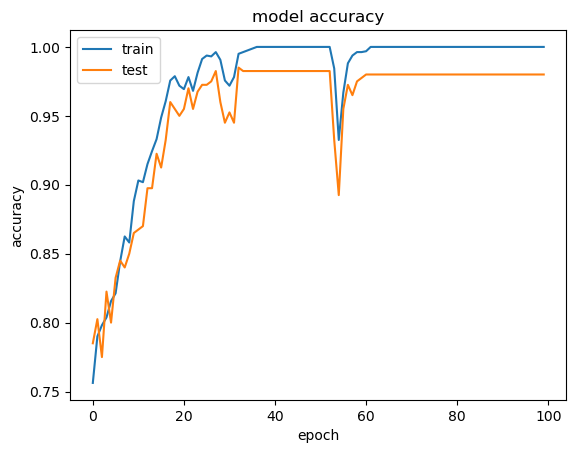

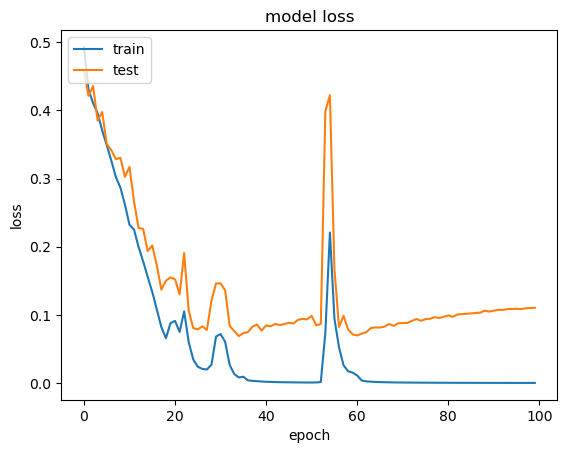

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

13/13 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       253
         1.0       0.96      0.99      0.97       147

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Text(0.5, 1.0, 'Confusion Matrix')

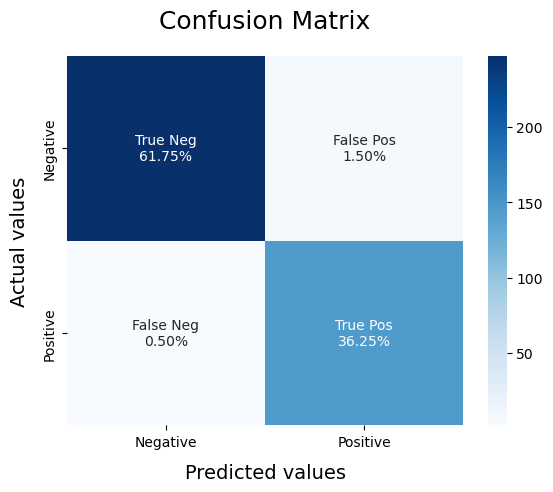

In [8]:
y_pred = model.predict(x_test)# name of model you want to draw Confusion Matrix amd ROC curve for it

for i in range(len(y_pred)) :
    if y_pred[i]<0.5 :
        y_pred[i]=0
    else :
        y_pred[i]=1
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)    

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


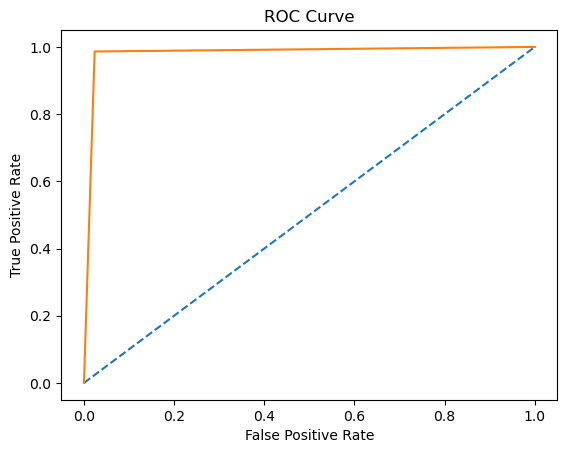

In [9]:
fpr, tpr, thresholds =roc_curve(y_test,y_pred)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')
plt.show()